In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
from sklearn.datasets import load_iris


In [86]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [87]:
iris = sns.load_dataset('iris')
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [88]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

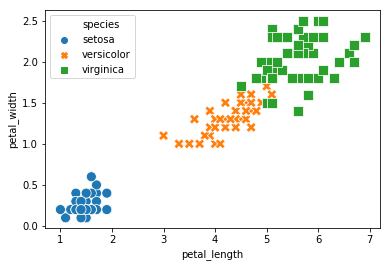

In [89]:
sns.scatterplot(x='petal_length', 
                y='petal_width', 
                hue='species', 
                style='species', 
                s=100, 
                data=iris)

plt.show()

In [90]:
X = np.array(iris[['petal_length', 'petal_width']])
y = iris['species']
y = np.where(y=='setosa', 0, np.where(y=='versicolor', 1, 2))

rfc = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=1004)
rfc.fit(X, y)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=1004)

In [91]:
pred = rfc.predict(X)
print(pred == y)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [92]:
h = 0.01
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

XY = np.c_[xx.ravel(), yy.ravel()]


XY.shape
Out[4]: (158600, 2)

# predict
pred_cls = rfc.predict(XY)
# align the shape of Z with xx
Z = pred_cls.reshape(xx.shape)


(0.9, 6.9900000000000055, 0.0, 2.59)

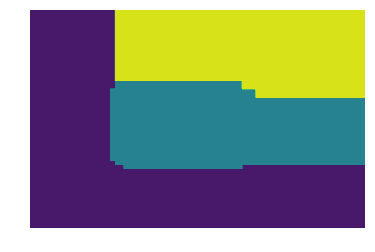

In [93]:
# Random Forest Classifier: Decision Boundary

plt.contourf(xx, yy, Z)

plt.axis('off')

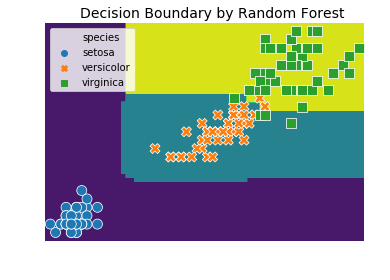

In [94]:
plt.contourf(xx, yy, Z)
plt.axis('off')

sns.scatterplot(x='petal_length', 
                y='petal_width', 
                hue='species', 
                style='species', 
                s=100, 
                data=iris)

plt.title('Decision Boundary by Random Forest', fontsize=14)
plt.show()


(-0.3194175226599981,
 7.255900696962385,
 -0.6558286467963068,
 2.668937465962357)

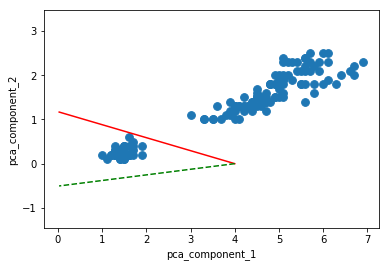

In [95]:
plt.scatter(iris['petal_length'], iris['petal_width'], s=60)

scale=5
plt.plot([4,pca.components_[0,0]*scale], [0,pca.components_[0,1]*scale],'r-')

scale=2
plt.plot([4,pca.components_[1,0]*scale], [0,pca.components_[1,1]*scale],'g--')

plt.xlabel(pca_columns[0])
plt.ylabel(pca_columns[1])
plt.axis('equal')

NameError: name 'plot_xor' is not defined

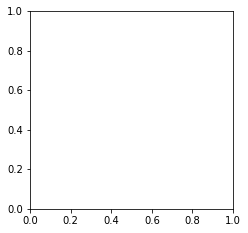

In [96]:
plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=2).fit(X_xor, y_xor), "RBF SVM (gamma=2)")
plt.subplot(222)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=10).fit(X_xor, y_xor), "RBF SVM (gamma=10)")
plt.subplot(223)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=50).fit(X_xor, y_xor), "RBF SVM (gamma=50)")
plt.subplot(224)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=100).fit(X_xor, y_xor), "RBF SVM (gamma=100)")
plt.tight_layout()
plt.show()

#

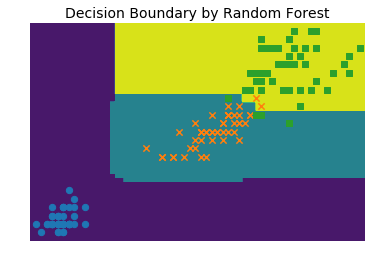

In [97]:
plt.contourf(xx, yy, Z)
plt.axis('off')

# or plot data points using matplotlib and for loop
N = 50
CLS_NUM = 3
markers = ['o', 'x', 's']
for i in range(CLS_NUM):
    plt.scatter(X[i*N: (i+1)*N, 0], X[i*N:(i+1)*N, 1], s=40, marker=markers[i])

plt.title('Decision Boundary by Random Forest', fontsize=14)
plt.show()

In [98]:

%matplotlib inline
# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()
# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


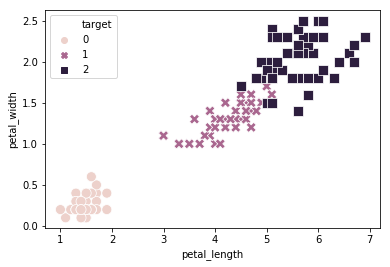

In [99]:
sns.scatterplot(x='petal_length', 
                y='petal_width', 
                hue='target', 
                style='target',
                s=100, 
                data=irisDF)

plt.show()

In [100]:

iris_scaled = StandardScaler().fit_transform(irisDF)

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [102]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


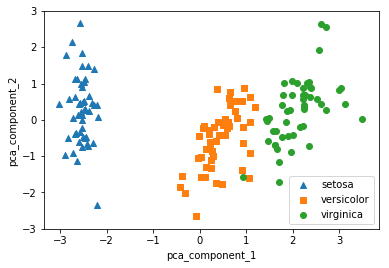

In [103]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])
# origin=[0],[0]
#plt.quiver(*origin,eigens_v[1,:], color=['r', 'b'], scale=3)

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [104]:
rfc=RandomForestClassifier(max_depth=2, n_estimators=100, random_state=33)

In [106]:
rfc.fit((X.y), -1)

AttributeError: 'numpy.ndarray' object has no attribute 'y'

In [107]:
X = np.array(iris[['petal_length', 'petal_width']])
y = iris['species']
y = np.where(y=='setosa', 0, np.where(y=='versicolor', 1, 2))

rfc = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=1004)
rfc.fit(X, y)

TypeError: unhashable type: 'list'

In [108]:
model=SVC(kernel='linear', C=1e10).fit(X,y)

In [109]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


### 다시 vacc로...

In [110]:
df=pd.read_csv('../data/H1N1_Flu_Vaccines_removed2.csv')
df

,Unnamed: 0,h1n1_vaccine,seasonal_vaccine,age_group,sex,h1n1_concern,h1n1_knowledge,behavioral_avoidance,behavioral_large_gatherings,behavioral_outside_home,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,income_poverty,employment_status
0,0,0,0,3,1,1,0,0,0,1,0,3,1,2,2,1,2,0,0,2
1,1,0,1,1,0,3,2,1,0,1,0,5,4,4,4,2,4,1,0,1
2,2,0,0,0,0,1,1,1,0,0,1,3,1,1,4,1,2,3,1,1
3,3,0,1,4,1,1,1,1,1,0,1,3,3,5,5,4,1,1,0,2
4,4,0,0,2,1,2,1,1,1,0,0,3,3,2,3,1,4,2,1,1
5,5,0,0,4,0,3,1,1,0,0,0,5,2,1,5,4,4,1,1,1
6,6,0,0,3,0,0,0,0,0,0,0,4,1,1,4,2,1,0,1,1
7,7,1,1,2,1,1,0,1,0,0,1,5,2,1,4,2,1,2,1,1
8,8,0,0,2,0,0,2,1,1,1,0,4,1,1,4,2,1,3,2,1
9,9,0,0,3,0,2,1,1,1,0,1,4,2,2,4,2,2,1,1,2


In [111]:
train_pre= df[['age_group','sex', 'education','income_poverty','employment_status', 
               'chronic_med_condition','h1n1_concern','h1n1_knowledge','behavioral_avoidance','behavioral_large_gatherings','behavioral_outside_home']]

In [112]:
from sklearn.preprocessing import StandardScaler
vacc_scaled = StandardScaler().fit_transform(df)

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(vacc_scaled)
vacc_pca = pca.transform(vacc_scaled)
print(vacc_pca.shape)

(21543, 2)


### PCA함수 이용. PCA.fix(x)의 결과 

In [114]:
print(pca.explained_variance_) #eigen value ?

[3.37390272 2.22750563]


In [115]:
PCscore=pca.transform(vacc_scaled)
PCscore[0:5] # X의 자료에 eigen vector를 곱한 값, 새로운 공간에서 좌표값으로 나타남

array([[-2.17611751,  3.72579168],
       [ 1.9314361 ,  1.08965834],
       [-2.42617007,  0.0334814 ],
       [ 1.92173191,  1.65159943],
       [-0.67652186,  1.66654671]])

In [116]:
eigens_v = pca.components_.transpose()

In [117]:
mX = np.matrix(vacc_scaled)
for i in range(vacc_scaled.shape[1]):
	mX[:,i] = mX[:,i]-np.mean(vacc_scaled[:,i])
dfmX = pd.DataFrame(mX)

In [118]:
(mX * eigens_v)[0:5]

matrix([[-2.17611751,  3.72579168],
        [ 1.9314361 ,  1.08965834],
        [-2.42617007,  0.0334814 ],
        [ 1.92173191,  1.65159943],
        [-0.67652186,  1.66654671]])

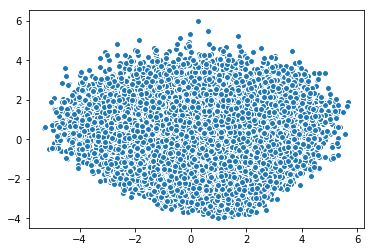

In [119]:
plt.scatter(PCscore[:,0],PCscore[:,1], edgecolors="white") # 0-X축 / 1-Y축
plt.show()

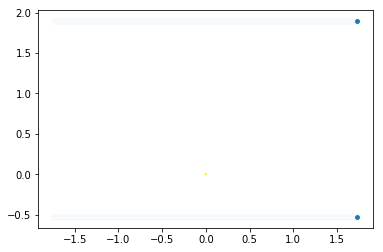

In [120]:
plt.scatter(dfmX[0],dfmX[1],  edgecolors="white")
origin = [0],[0]  #origin pint
plt.quiver(*origin,eigens_v[1,:],color=["r","b"],scale=3)
plt.show()
# iris or vacc? vacc인데 iris 생각나는 그래프가 나오네...? 근데 또 달라지네? 허허

In [121]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
vaccDF_pca = pd.DataFrame(vacc_pca,columns=pca_columns)
vaccDF_pca['target']=df['h1n1_vaccine']
vaccDF_pca.head(30)

,pca_component_1,pca_component_2,target
0,-2.176118,3.725792,0
1,1.931436,1.089658,0
2,-2.426170,0.033481,0
3,1.921732,1.651599,0
4,-0.676522,1.666547,0
5,0.575418,0.225004,0
6,-2.872444,1.036313,0
7,0.007491,-0.886892,1
8,-1.664630,-0.521539,0
9,0.030171,1.521870,0


In [122]:
target_name=np.array(['h1n1_vacc_no', 'h1n1_vacc_yes'])

In [123]:
target=df['h1n1_vaccine']

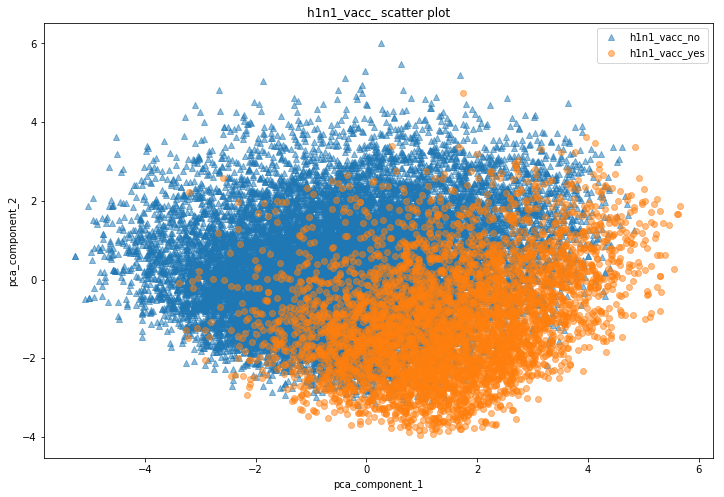

In [124]:
#비접종(0)을 세모, 접종(1)을 동그라미로 표시
plt.figure(figsize=(12,8))
markers=['^', 'o']
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = vaccDF_pca[vaccDF_pca['target']==i]['pca_component_1']
    y_axis_data = vaccDF_pca[vaccDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, 
                y_axis_data, 
                marker=marker,
                label=df['h1n1_vaccine'],
                alpha=0.5)
    
plt.legend(['h1n1_vacc_no', 'h1n1_vacc_yes'])
plt.title('h1n1_vacc_ scatter plot')
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [125]:
X=x_axis_data
y=y_axis_data

In [126]:
X

7        0.007491
10       1.691796
11      -0.861002
16       1.923531
29       1.782591
30      -0.949219
31       3.803008
35       2.141172
36       0.698354
38      -0.417758
39      -2.104809
40       3.160574
41       1.203470
50       3.530978
55      -0.004903
61       3.972946
66       3.339308
68       3.607400
83       1.050192
86       2.753814
87       3.217400
90      -0.031280
94      -1.307260
95       3.299674
100      3.088665
101      2.947153
112      1.760940
122      2.866712
128      3.357038
135      2.120139
           ...   
21387   -0.549280
21396    1.998338
21398    2.627676
21402    2.483686
21406    3.553530
21412    4.217155
21414    3.493242
21429    0.639342
21437    4.443079
21458    1.846901
21461    2.313932
21464    3.706754
21468    5.622878
21471    0.718118
21474   -1.326310
21480    2.373717
21484    1.653732
21488    0.676879
21496    0.196543
21498    0.114534
21500    0.072526
21502   -0.293676
21504    1.388200
21510    2.254071
21512    1

In [127]:
y

7       -0.886892
10       0.213695
11      -2.571393
16       0.890122
29       0.240993
30      -2.499149
31       2.313469
35      -0.915853
36      -0.189534
38      -2.365023
39      -2.641893
40      -1.696573
41      -2.331969
50      -0.456870
55      -2.268597
61       1.113032
66      -0.767654
68       0.517705
83      -3.131943
86      -1.862134
87      -0.749688
90      -0.965642
94      -0.710990
95      -0.181174
100     -0.519923
101      0.021349
112     -1.567674
122     -1.619281
128      1.835963
135      1.210295
           ...   
21387   -1.957505
21396   -2.052176
21398   -2.873308
21402   -0.084322
21406   -1.742252
21412    0.027029
21414   -0.379903
21429   -2.114664
21437    0.086178
21458   -2.156793
21461   -0.389980
21464    0.001212
21468    1.667234
21471   -0.578764
21474   -1.796542
21480   -0.620804
21484   -3.279621
21488   -2.559625
21496   -2.725632
21498   -0.984807
21500   -2.467014
21502   -1.301008
21504   -1.090516
21510    0.430570
21512   -1

In [128]:
pca.explained_variance_

array([3.37390272, 2.22750563])

In [129]:
ratio=pca.explained_variance_ratio_

In [130]:
ratio

array([0.16868731, 0.11137011])

이하 또 iris

In [131]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

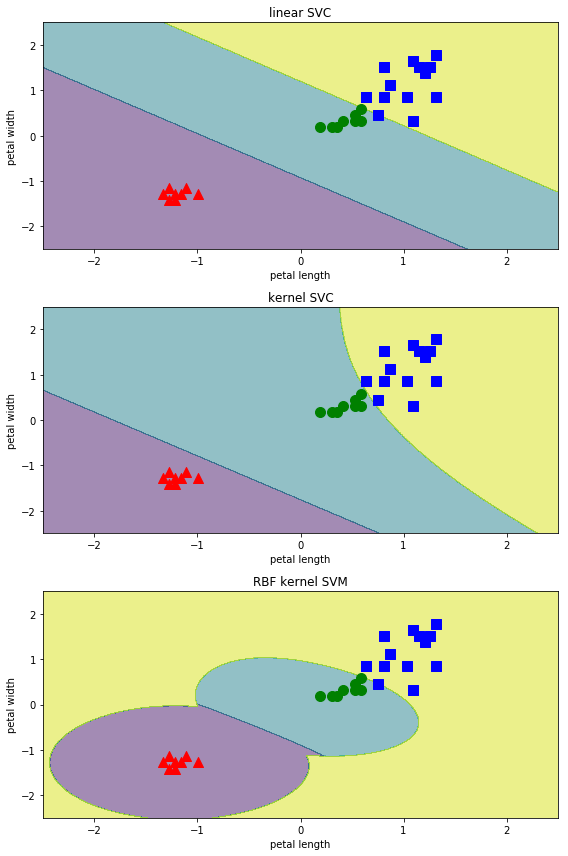

In [132]:
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=33)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.title(title)


model1 = SVC(kernel='linear').fit(X_test_std, y_test)
model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_test_std, y_test)
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, y_test, model1, "linear SVC")
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "kernel SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF kernel SVM")
plt.tight_layout()
plt.show()

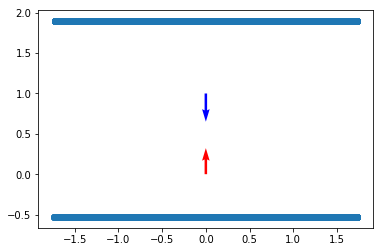

In [133]:
plt.scatter(dfmX[0],dfmX[1])
origin = [0],[0]  #origin pint
plt.quiver(origin,eigens_v[1,:],color=["r","b"],scale=3)
plt.show()
#quiver가 벡터대로 나오지 않는 상태...
# plt.quiver(*origin,eigens_v[1,:],color=["r","b"],scale=3) <- 얘로 하면 퀴버가 사라짐

In [134]:
eigens_v = pca.components_.transpose()
# column vector가 eigen vector가 되도록 transpose()
# 현재 2X2라 티가 안나지만, nxp의 경우는 shape를 통해 확인가능

# PCscore를 구하기위해 eigen vector를 곱하기 전에 centering 작업
mX = np.matrix(X)
for i in range(X.shape[1]):
	mX[:,i] = mX[:,i]-np.mean(X[:,i])
dfmX = pd.DataFrame(mX)

# PC score를 구하기 위해 eigen vector를 곱함
(mX * eigens_v)[0:5]

ValueError: shapes (150,2) and (20,2) not aligned: 2 (dim 1) != 20 (dim 0)

## 안되겠다 그냥 다시 연습...

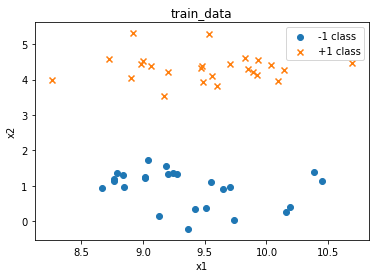

In [136]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("train_data")
plt.show()

In [137]:
SVC(kernel='linear', C=1e10)

SVC(C=10000000000.0, kernel='linear')

In [138]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

In [139]:
model.n_support_


array([1, 1])

In [140]:
model.support_


array([42,  1])

In [141]:
model.support_vectors_


array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [142]:
y[model.support_]


array([-1,  1])

In [135]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM prediction result")

plt.show()

ValueError: setting an array element with a sequence.

## KNN의 시각화

In [143]:
from matplotlib.colors import ListedColormap
# https://todayisbetterthanyesterday.tistory.com/21?category=821465

In [144]:
import sklearn

In [145]:
# import library
from sklearn import neighbors, datasets
# KNN운 neighbors에, 실습할 데이터 iris는 datasets에
import numpy as np

# load datasets
iris = datasets.load_iris()

X = iris.data[:,:2]
# 간편한 실습을 위해 변수 두 개만 사용
y = iris.target

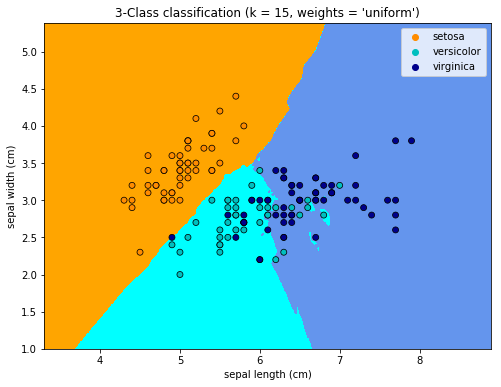

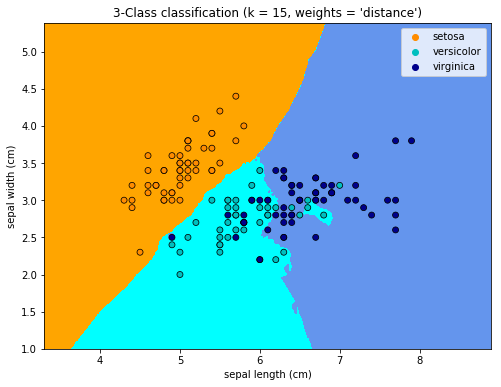

In [146]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

In [147]:
y_pred = clf.predict(X)                  # fitting결과 target 예측(분류)


In [148]:
# confusion_matrix를 활용한 모델예측 정확도 측정
from sklearn.metrics import confusion_matrix 
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0, 10, 40]], dtype=int64)

In [149]:
from sklearn.model_selection import cross_val_score


In [150]:
k_range = range(1,100)              # k를 1~100까지 고려하여 최적의 k를 찾을 것이다.
k_score = []                        # 각 k들의 성능을 비교하기 위한 리스트생성이다.

for k in k_range :
    knn = neighbors.KNeighnorsClassifier(k)
    scores = cross_val_score(knn,X,y,cv=10,scoring = "accuracy")
    # 10-fold cross-validation
    k_scores.append(scores.mean())
    # 10-fold 각각 정확도의 평균으로 성능계산 

AttributeError: module 'sklearn.neighbors' has no attribute 'KNeighnorsClassifier'

In [ ]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline


print(__doc__)

n_neighbors = 5

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

h = .01  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

names = ['KNN', 'NCA, KNN']

classifiers = [Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('nca', NeighborhoodComponentsAnalysis()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ])
               ]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(0.9, 0.1, '{:.2f}'.format(score), size=15,
             ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

In [151]:
from matplotlib.pyplot import subplot

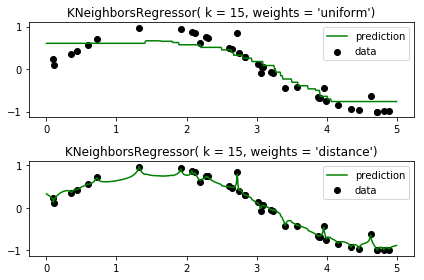

In [152]:
# 새로운 DataSet형성 
# sin함수를 예측하고자 한다.

np.random.seed(0)                                # 난수고정
X = np.sort(5 * np.random.rand(40,1), axis = 0)
T = np.linspace(0,5,500)[:,np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

# knn 가중치 부여 및 미부여 비교

n_neighbors = 15                                   # k = 5

for i, weights in enumerate(['uniform','distance']):

	knn = neighbors.KNeighborsRegressor(n_neighbors, weights = weights)
	y_ = knn.fit(X,y).predict(T)
    
	plt.subplot(2,1,i+1)
	plt.scatter(X,y,c='k',label = 'data')
	plt.plot(T,y_,c='g',label = 'prediction')
	plt.axis('tight')
	plt.legend()
	plt.title("KNeighborsRegressor( k = %i, weights = '%s')" % (n_neighbors, weights))
    
plt.tight_layout()
plt.show()

# Plot classification probability

https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html#sphx-glr-auto-examples-classification-plot-classification-probability-py

iris 사용

In [153]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

iris = datasets.load_iris()
X = iris[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                      random_state=0),
    'GPC': GaussianProcessClassifier(kernel)
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

TypeError: unhashable type: 'slice'

In [154]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

X = np.array(df[1,2])  # we only take the first two features for visualization
y = h1n1_arr

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                      random_state=0),
    'GPC': GaussianProcessClassifier(kernel)
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='w', edgecolor='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

KeyError: (1, 2)

In [155]:
h1n1_arr=np.array(df['h1n1_vaccine'])

In [156]:
h1n1_arr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
iris.data[:, 0:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [158]:
np.array(df[:, 0:2])

TypeError: unhashable type: 'slice'